<a href="https://colab.research.google.com/github/amirmafzali/Neural_network-and-deep-learning_course/blob/main/Air-pollution%20forecasting%20by%20hybrid%20CNN-LSTM%20(without%20scaling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [2]:
aot = pd.read_csv('/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv')
cha = pd.read_csv('/content/PRSA_Data_Changping_20130301-20170228.csv')
din = pd.read_csv('/content/PRSA_Data_Dingling_20130301-20170228.csv')
don = pd.read_csv('/content/PRSA_Data_Dongsi_20130301-20170228.csv')
gua = pd.read_csv('/content/PRSA_Data_Guanyuan_20130301-20170228.csv')
guc = pd.read_csv('/content/PRSA_Data_Gucheng_20130301-20170228.csv')
hua = pd.read_csv('/content/PRSA_Data_Huairou_20130301-20170228.csv')
non = pd.read_csv('/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv')
shu = pd.read_csv('/content/PRSA_Data_Shunyi_20130301-20170228.csv')
tia = pd.read_csv('/content/PRSA_Data_Tiantan_20130301-20170228.csv')
wan = pd.read_csv('/content/PRSA_Data_Wanliu_20130301-20170228.csv')
wansh = pd.read_csv('/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv')

In [3]:
wd = {
    'N': 0,
    'NNE': 22.5,
    'NE': 45,
    'ENE': 67.5,
    'E': 90,
    'ESE': 112.5,
    'SE': 135,
    'SSE': 157.5,
    'S': 180,
    'SSW': 202.5,
    'SW': 225,
    'WSW': 247.5,
    'W': 270,
    'WNW': 292.5,
    'NW': 315,
    'NNW': 337.5,
}


aot['wd']=aot['wd'].map(wd)

date = aot[['year','month','day','hour']]
aot = aot.drop(['No','year','month','day','hour','station'],axis=1)

aot.head(10)

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,337.5,4.4
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,0.0,4.7
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,337.5,5.6
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,315.0,3.1
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,0.0,2.0
5,5.0,5.0,18.0,18.0,400.0,66.0,-2.2,1025.6,-19.6,0.0,0.0,3.7
6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,22.5,2.5
7,3.0,6.0,19.0,41.0,500.0,43.0,-1.6,1027.4,-19.1,0.0,337.5,3.8
8,3.0,6.0,16.0,43.0,500.0,45.0,0.1,1028.3,-19.2,0.0,337.5,4.1
9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,0.0,2.6


In [4]:
aot.isnull().sum()

PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1776
O3       1719
TEMP       20
PRES       20
DEWP       20
RAIN       20
wd         81
WSPM       14
dtype: int64

In [5]:
aot = aot.interpolate(method ='linear')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd7ec320f10>,
      dtype=object)

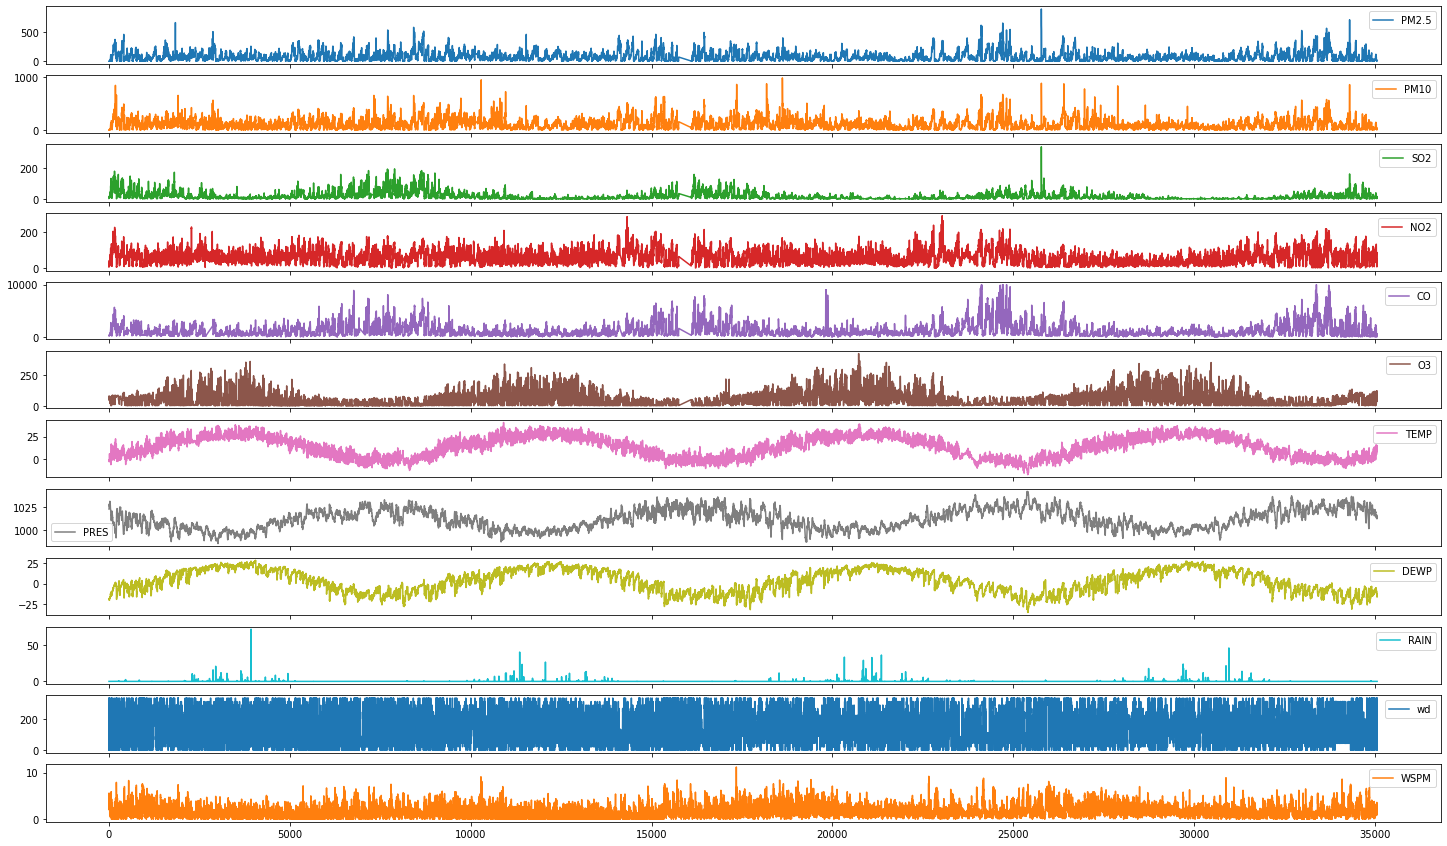

In [6]:
aot.plot(subplots=True,figsize=(25,15))

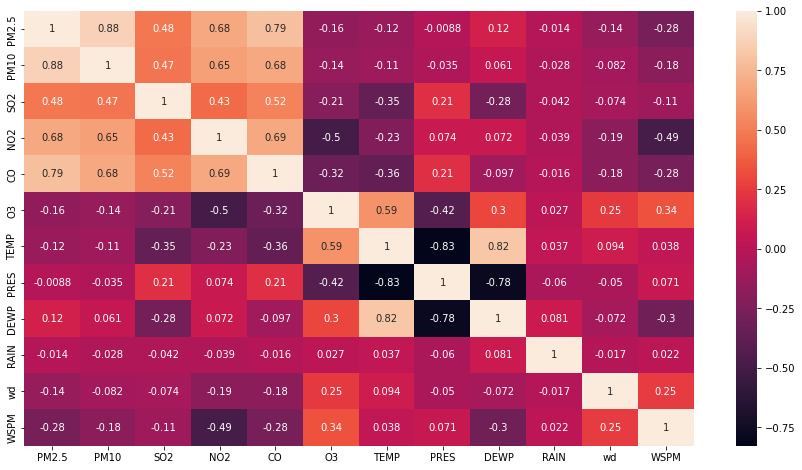

In [7]:
corr_matrix = aot.corr(method='pearson')
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [8]:
aot = aot.drop(['SO2','NO2','O3'],axis=1)

In [9]:
cha_pm = cha[['PM2.5']]
cha_pm.rename(columns = {'PM2.5':'PM2.5_cha'}, inplace = True)

din_pm = din[['PM2.5']]
din_pm.rename(columns = {'PM2.5':'PM2.5_din'}, inplace = True)

don_pm = don[['PM2.5']]
don_pm.rename(columns = {'PM2.5':'PM2.5_don'}, inplace = True)

gua_pm = gua[['PM2.5']]
gua_pm.rename(columns = {'PM2.5':'PM2.5_gua'}, inplace = True)

guc_pm = guc[['PM2.5']]
guc_pm.rename(columns = {'PM2.5':'PM2.5_guc'}, inplace = True)

hua_pm = hua[['PM2.5']]
hua_pm.rename(columns = {'PM2.5':'PM2.5_hua'}, inplace = True)

non_pm = non[['PM2.5']]
non_pm.rename(columns = {'PM2.5':'PM2.5_non'}, inplace = True)

shu_pm = shu[['PM2.5']]
shu_pm.rename(columns = {'PM2.5':'PM2.5_shu'}, inplace = True)

tia_pm = tia[['PM2.5']]
tia_pm.rename(columns = {'PM2.5':'PM2.5_tia'}, inplace = True)

wan_pm = wan[['PM2.5']]
wan_pm.rename(columns = {'PM2.5':'PM2.5_wan'}, inplace = True)

wansh_pm = wansh[['PM2.5']]
wansh_pm.rename(columns = {'PM2.5':'PM2.5_wansh'}, inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
cha_pm

,PM2.5_cha
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
...,...
35059,28.0
35060,12.0
35061,7.0
35062,11.0


In [11]:
cha_pm = cha_pm.interpolate(method ='linear')
din_pm = din_pm.interpolate(method ='linear')
don_pm = don_pm.interpolate(method ='linear')
gua_pm = gua_pm.interpolate(method ='linear')
guc_pm = guc_pm.interpolate(method ='linear')
hua_pm = hua_pm.interpolate(method ='linear')
non_pm = non_pm.interpolate(method ='linear')
shu_pm = shu_pm.interpolate(method ='linear')
tia_pm = tia_pm.interpolate(method ='linear')
wan_pm = wan_pm.interpolate(method ='linear')
wansh_pm = wansh_pm.interpolate(method ='linear')

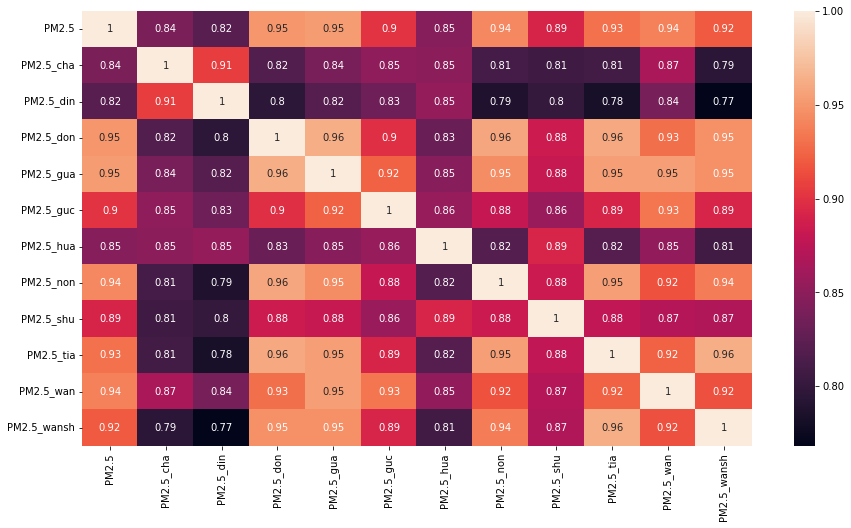

In [12]:
df_1 = aot['PM2.5']
df_2 = cha_pm['PM2.5_cha']
df_3 = din_pm['PM2.5_din']
df_4 = don_pm['PM2.5_don']
df_5 = gua_pm['PM2.5_gua']
df_6 = guc_pm['PM2.5_guc']
df_7 = hua_pm['PM2.5_hua']
df_8 = non_pm['PM2.5_non']
df_9 = shu_pm['PM2.5_shu']
df_10 = tia_pm['PM2.5_tia']
df_11 = wan_pm['PM2.5_wan']
df_12 = wansh_pm['PM2.5_wansh']

corr_matrix = pd.concat([df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12],axis=1).corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [13]:
df = pd.concat([aot,cha_pm,din_pm,don_pm,gua_pm,guc_pm,hua_pm,non_pm,shu_pm,tia_pm,wan_pm,wansh_pm],axis=1)

In [14]:
df

,PM2.5,PM10,CO,TEMP,PRES,DEWP,RAIN,wd,WSPM,PM2.5_cha,PM2.5_din,PM2.5_don,PM2.5_gua,PM2.5_guc,PM2.5_hua,PM2.5_non,PM2.5_shu,PM2.5_tia,PM2.5_wan,PM2.5_wansh
0,4.0,4.0,300.0,-0.7,1023.0,-18.8,0.0,337.5,4.4,3.0,4.0,9.0,4.0,6.0,7.0,5.0,3.0,6.0,8.0,9.0
1,8.0,8.0,300.0,-1.1,1023.2,-18.2,0.0,0.0,4.7,3.0,7.0,4.0,4.0,6.0,4.0,8.0,12.0,6.0,9.0,11.0
2,7.0,7.0,300.0,-1.1,1023.5,-18.2,0.0,337.5,5.6,3.0,5.0,7.0,3.0,5.0,4.0,3.0,14.0,6.0,3.0,8.0
3,6.0,6.0,300.0,-1.4,1024.5,-19.4,0.0,315.0,3.1,3.0,6.0,3.0,3.0,6.0,3.0,5.0,12.0,6.0,11.0,8.0
4,3.0,3.0,300.0,-2.0,1025.2,-19.5,0.0,0.0,2.0,3.0,5.0,3.0,3.0,5.0,3.0,5.0,12.0,5.0,3.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,12.0,29.0,400.0,12.5,1013.5,-16.2,0.0,315.0,2.4,28.0,11.0,16.0,13.0,14.0,16.0,14.0,27.0,20.0,11.0,11.0
35060,13.0,37.0,500.0,11.6,1013.6,-15.1,0.0,292.5,0.9,12.0,13.0,18.0,20.0,27.0,21.0,18.0,47.0,11.0,15.0,13.0
35061,16.0,37.0,700.0,10.8,1014.2,-13.3,0.0,315.0,1.1,7.0,9.0,23.0,16.0,22.0,17.0,15.0,18.0,18.0,13.0,14.0
35062,21.0,44.0,700.0,10.5,1014.4,-12.9,0.0,337.5,1.2,11.0,10.0,23.0,11.0,9.0,11.0,11.0,18.0,15.0,12.0,12.0


In [15]:
df = pd.concat([date,df],axis=1)

In [16]:
df.index = pd.to_datetime(df[['year', 'month', 'day', 'hour']], format='%Y %m %d %H')
df = df.drop(columns=['year', 'month', 'day', 'hour'])

In [17]:
df.to_csv(r'/content/DATASET without scaling.csv')

In [18]:
data = np.array(df)

In [19]:
data.shape

(35064, 20)

In [20]:
X = []
Y = []

lag_hour = 1*24

for i in range (lag_hour , len(data)):
  X.append(data[i-lag_hour:i,:])
  Y.append(data[i,:1])

X = np.array(X)
Y = np.array(Y)

print('X.shape : ',X.shape,'\nY.shape : ',Y.shape)

X.shape :  (35040, 24, 20) 
Y.shape :  (35040, 1)


In [21]:
print(X[0][0],'\n\n',Y[0]) 

[ 4.000e+00  4.000e+00  3.000e+02 -7.000e-01  1.023e+03 -1.880e+01
  0.000e+00  3.375e+02  4.400e+00  3.000e+00  4.000e+00  9.000e+00
  4.000e+00  6.000e+00  7.000e+00  5.000e+00  3.000e+00  6.000e+00
  8.000e+00  9.000e+00] 

 [22.]


In [22]:
print(X[1][0],'\n\n',Y[1]) 

[   8.     8.   300.    -1.1 1023.2  -18.2    0.     0.     4.7    3.
    7.     4.     4.     6.     4.     8.    12.     6.     9.    11. ] 

 [14.]


In [23]:
X_train = X[:28032]
X_test = X[28032:]
Y_train = Y[:28032]
Y_test = Y[28032:]

print('X_train : ',X_train.shape,'\nY_train : ',Y_train.shape,'\nX_test  : ',X_test.shape,'\nY_test  : ',Y_test.shape)

X_train :  (28032, 24, 20) 
Y_train :  (28032, 1) 
X_test  :  (7008, 24, 20) 
Y_test  :  (7008, 1)


In [24]:
model=keras.models.Sequential([
    
    keras.layers.Conv1D(filters=64, kernel_size=3,
                        activation='relu', input_shape=(24,20),
                        padding='causal'),

    keras.layers.BatchNormalization(),
    
    keras.layers.Conv1D(filters=64, kernel_size=3,
                        activation='relu', padding='causal'),
                        
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv1D(filters=32, kernel_size=3,
                        activation='relu', padding='causal'),

    keras.layers.MaxPool1D(pool_size=3),

    keras.layers.LSTM(100,return_sequences=True),

    keras.layers.Dropout(0.2),

    keras.layers.LSTM(50),

    keras.layers.Dropout(0.3),

    keras.layers.Dense(1,activation='relu')
])

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 24, 64)            3904      
                                                                 
 batch_normalization (BatchN  (None, 24, 64)           256       
 ormalization)                                                   
                                                                 
 conv1d_1 (Conv1D)           (None, 24, 64)            12352     
                                                                 
 batch_normalization_1 (Batc  (None, 24, 64)           256       
 hNormalization)                                                 
                                                                 
 conv1d_2 (Conv1D)           (None, 24, 32)            6176      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 8, 32)            0

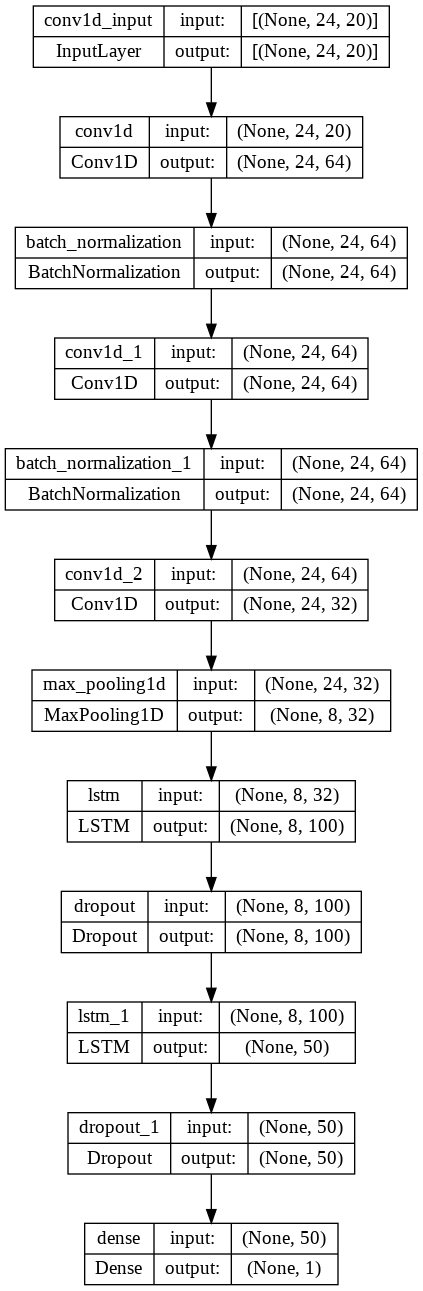

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')

tf.keras.utils.plot_model(model=model, show_shapes=True)

In [27]:
early_stopping = keras.callbacks.EarlyStopping(monitor="loss", patience=50, min_delta=1e-3 ,restore_best_weights=True)

model_ns = model.fit(X_train,Y_train, 
                                    validation_data=(X_test,Y_test),
                                    epochs=200,
                                    batch_size=32,
                                    verbose=2,
                                    callbacks=[early_stopping])

Epoch 1/200
876/876 - 19s - loss: 9753.3691 - val_loss: 8094.2896 - 19s/epoch - 22ms/step
Epoch 2/200
876/876 - 6s - loss: 6689.2715 - val_loss: 5576.8013 - 6s/epoch - 7ms/step
Epoch 3/200
876/876 - 6s - loss: 4513.3452 - val_loss: 3970.7637 - 6s/epoch - 7ms/step
Epoch 4/200
876/876 - 6s - loss: 3314.1628 - val_loss: 3034.6416 - 6s/epoch - 7ms/step
Epoch 5/200
876/876 - 6s - loss: 2529.9446 - val_loss: 2340.8987 - 6s/epoch - 7ms/step
Epoch 6/200
876/876 - 6s - loss: 2005.1328 - val_loss: 1900.9358 - 6s/epoch - 7ms/step
Epoch 7/200
876/876 - 6s - loss: 1641.9301 - val_loss: 1526.3162 - 6s/epoch - 7ms/step
Epoch 8/200
876/876 - 6s - loss: 1359.9567 - val_loss: 1270.1174 - 6s/epoch - 7ms/step
Epoch 9/200
876/876 - 6s - loss: 1150.1388 - val_loss: 1073.1554 - 6s/epoch - 7ms/step
Epoch 10/200
876/876 - 6s - loss: 1026.1392 - val_loss: 944.2628 - 6s/epoch - 7ms/step
Epoch 11/200
876/876 - 7s - loss: 910.1878 - val_loss: 832.7883 - 7s/epoch - 8ms/step
Epoch 12/200
876/876 - 6s - loss: 830.978

Text(0, 0.5, 'MSE')

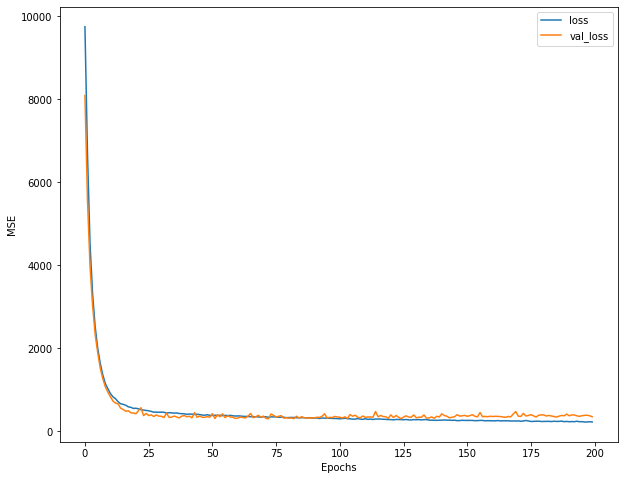

In [29]:
plt.figure(figsize=(10,8))
plt.plot(model_ns.history["loss"],label="loss")
plt.plot(model_ns.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [30]:
Y_pred = model.predict(X_test)

219/219 [==============================] - 1s 3ms/step


In [31]:
MSE = mean_squared_error(Y_test, Y_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(Y_test,Y_pred)
R2 = r2_score(Y_test,Y_pred)

print('MSE  : ',MSE,'\nRMSE : ',RMSE,'\nMAE  : ',MAE,'\nR2   : ',R2)

MSE  :  350.5382666251563 
RMSE :  18.722667187800898 
MAE  :  10.575957858165383 
R2   :  0.9498619714887114


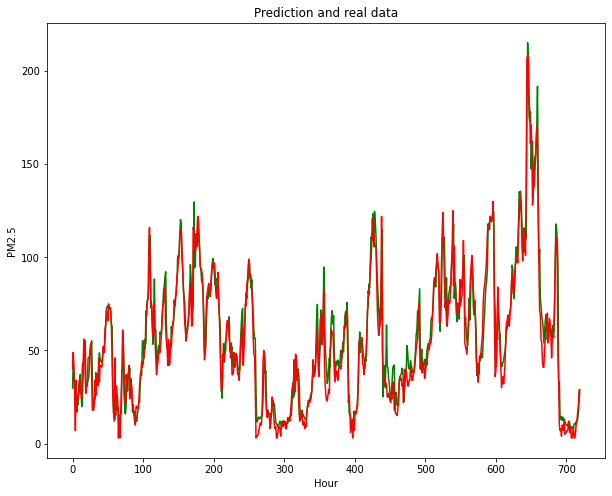

In [32]:
plt.figure(figsize=(10,8))
plt.plot(Y_pred[:720,:], color= 'green')
plt.plot(Y_test[:720,:] , color = 'red')
plt.title("Prediction and real data")
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.show()

In [33]:
X_2 = []
Y_2 = []

lag_hour = 7*24

for i in range (lag_hour , len(data)):
  X_2.append(data[i-lag_hour:i,:])
  Y_2.append(data[i,:1])

X_2 = np.array(X_2)
Y_2 = np.array(Y_2)

print('X_2.shape : ',X_2.shape,'\nY_2.shape : ',Y_2.shape)

X_2.shape :  (34896, 168, 20) 
Y_2.shape :  (34896, 1)


In [34]:
X_2_train = X_2[:28032]
X_2_test = X_2[28032:]
Y_2_train = Y_2[:28032]
Y_2_test = Y_2[28032:]

print('X_2_train : ',X_2_train.shape,'\nY_2_train : ',Y_2_train.shape,'\nX_2_test  : ',X_2_test.shape,'\nY_2_test  : ',Y_2_test.shape)

X_2_train :  (28032, 168, 20) 
Y_2_train :  (28032, 1) 
X_2_test  :  (6864, 168, 20) 
Y_2_test  :  (6864, 1)


In [35]:
model_2=keras.models.Sequential([
    
    keras.layers.Conv1D(filters=64, kernel_size=3,
                        activation='relu', input_shape=(168,20),
                        padding='causal'),

    keras.layers.BatchNormalization(),
    
    keras.layers.Conv1D(filters=64, kernel_size=3,
                        activation='relu', padding='causal'),
                        
    keras.layers.BatchNormalization(),
    
    keras.layers.Conv1D(filters=32, kernel_size=3,
                        activation='relu', padding='causal'),

    keras.layers.MaxPool1D(pool_size=3),

    keras.layers.LSTM(100,return_sequences=True),

    keras.layers.Dropout(0.2),

    keras.layers.LSTM(50),

    keras.layers.Dropout(0.3),

    keras.layers.Dense(1,activation='relu')
])

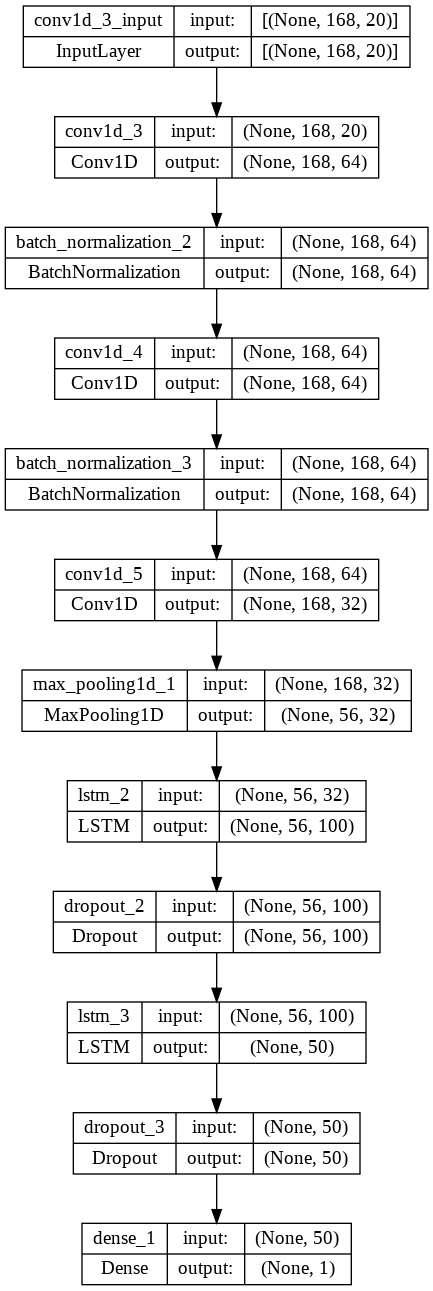

In [36]:
ADAM = keras.optimizers.Adam(learning_rate=0.001)

model_2.compile(optimizer=ADAM,loss='mean_squared_error')

tf.keras.utils.plot_model(model=model_2, show_shapes=True)

In [37]:
early_stopping = keras.callbacks.EarlyStopping(monitor="loss", patience=50, min_delta=1e-3 ,restore_best_weights=True)

model_norm = model_2.fit(X_2_train,Y_2_train, 
                                    validation_data=(X_2_test,Y_2_test),
                                    epochs=200,
                                    batch_size=32,
                                    callbacks=[early_stopping])

Epoch 1/200
876/876 [==============================] - 15s 13ms/step - loss: 9675.3789 - val_loss: 8283.9404
Epoch 2/200
876/876 [==============================] - 10s 11ms/step - loss: 6756.1353 - val_loss: 5684.6714
Epoch 3/200
876/876 [==============================] - 11s 13ms/step - loss: 4546.1924 - val_loss: 4113.2412
Epoch 4/200
876/876 [==============================] - 10s 11ms/step - loss: 3343.9690 - val_loss: 3150.3386
Epoch 5/200
876/876 [==============================] - 10s 11ms/step - loss: 2550.8157 - val_loss: 2541.4155
Epoch 6/200
876/876 [==============================] - 9s 11ms/step - loss: 2022.4973 - val_loss: 2078.7793
Epoch 7/200
876/876 [==============================] - 10s 11ms/step - loss: 1634.5657 - val_loss: 1597.6908
Epoch 8/200
876/876 [==============================] - 9s 11ms/step - loss: 1363.1112 - val_loss: 1426.8043
Epoch 9/200
876/876 [==============================] - 10s 11ms/step - loss: 1185.0132 - val_loss: 1104.0807
Epoch 10/200
876/876 

Text(0, 0.5, 'MSE')

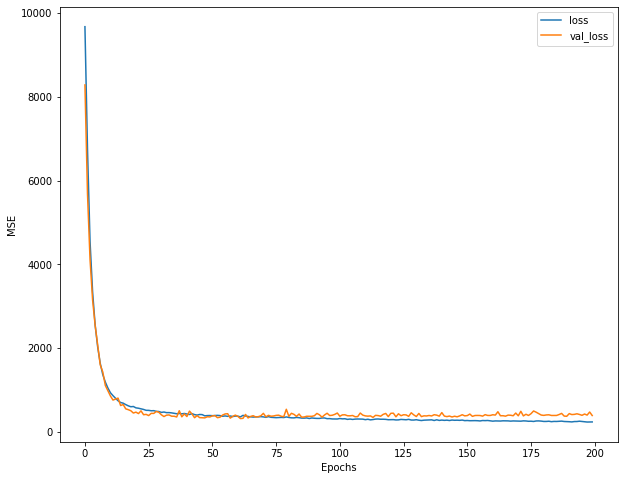

In [42]:
plt.figure(figsize=(10,8))
plt.plot(model_norm.history["loss"],label="loss")
plt.plot(model_norm.history["val_loss"],label="val_loss")
plt.legend(loc="best")
plt.xlabel("Epochs")
plt.ylabel("MSE")

In [39]:
Y_2_pred = model_2.predict(X_2_test)

215/215 [==============================] - 2s 5ms/step


In [40]:
MSE = mean_squared_error(Y_2_test, Y_2_pred)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(Y_2_test,Y_2_pred)
R2 = r2_score(Y_2_test,Y_2_pred)

print('MSE  : ',MSE,'\nRMSE : ',RMSE,'\nMAE  : ',MAE,'\nR2   : ',R2)

MSE  :  386.02948824438863 
RMSE :  19.647633146116828 
MAE  :  11.072148230027242 
R2   :  0.9456370486318338


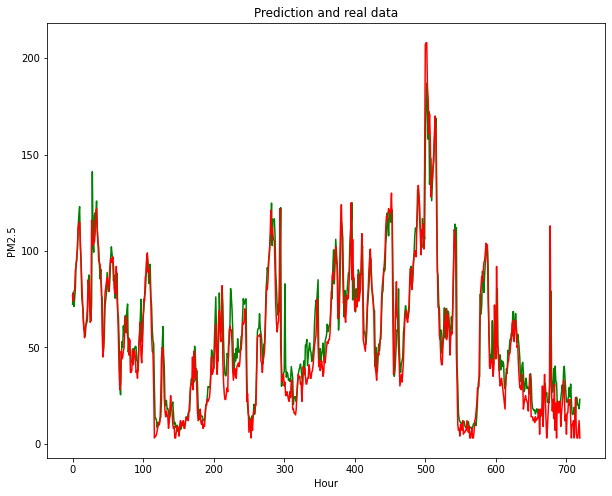

In [41]:
plt.figure(figsize=(10,8))
plt.plot(Y_2_pred[:720,:], color= 'green')
plt.plot(Y_2_test[:720,:] , color = 'red')
plt.title("Prediction and real data")
plt.xlabel("Hour")
plt.ylabel("PM2.5")
plt.show()